# COLORIZE IT!

## A.K.A. Let's make the graphs look nice now that we have the data.

So I have a bunch of data cubes that hold the difference in relative intensity between Specular and Lambertian simulations at every conceivable viewing angle. The ultimate goal is to make nice graphs of all the results so we can see what's going on.

For the record all data is Specular - Lambertian. And the files should all be in the containing folder. 

So let's just start making the code.

<IPython.core.display.Javascript object>


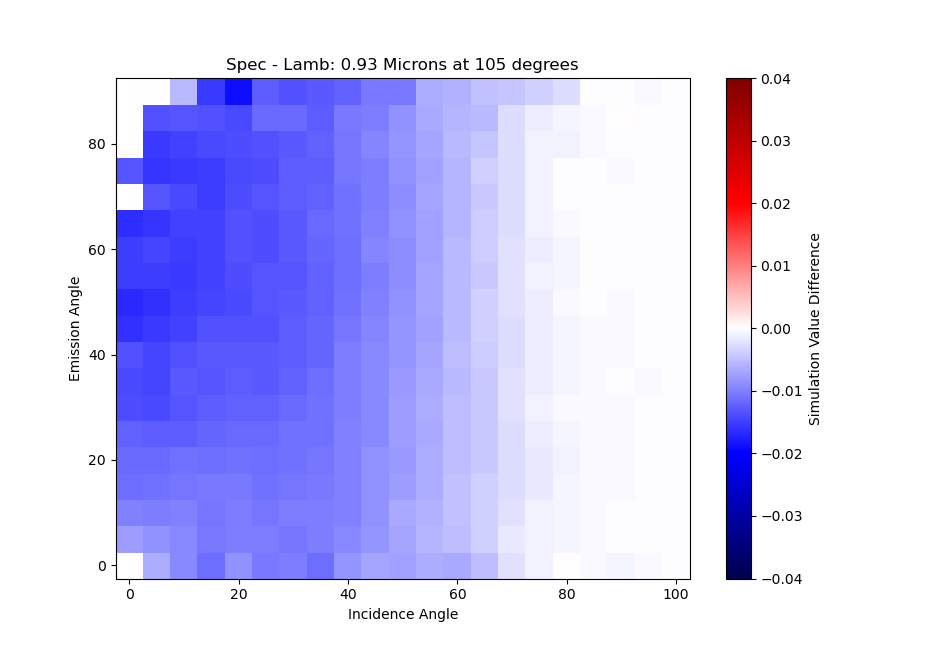

In [1]:
%matplotlib notebook
# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 

with open('iephi_consolidate_DIFF_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage[i][j][k] = float(row[i])
            if (math.isnan(dataStorage[i][j][k])):
                dataStorage[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
        
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.04
cmap = 'seismic'

c = ax.pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
fig.colorbar(c, ax=ax, label='Simulation Value Difference')
# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    ax.clear()
    zz = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz[y][x] = dataStorage[x][y][frame]
    azimuth = ax.pcolor(xx, yy, zz, cmap=cmap, vmin=-scale, vmax=scale)
    ax.set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = 'Spec - Lamb: 0.93 Microns at '+angles[frame]+ ' degrees')
    

ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=5)
ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


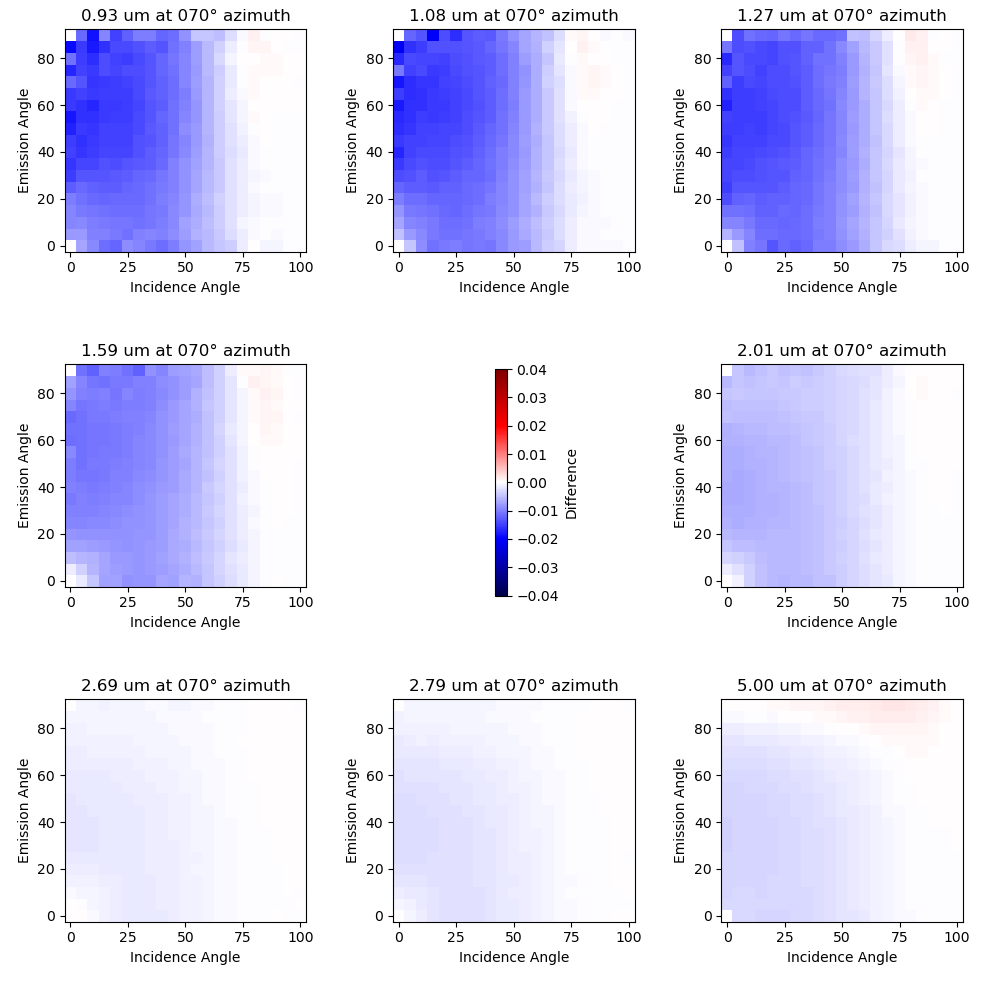

C:\Users\deran\AppData\Local\Temp\ipykernel_17316\4244536956.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


In [8]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_DIFF_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.08w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.27w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.59w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.01w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.69w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.79w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_5.00w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.04
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
fig.colorbar(c4, ax=cax, label='Difference') 
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
axs[1,1].axis('off')
cax.axis('off')
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ '° azimuth')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ '° azimuth')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ '° azimuth')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ '° azimuth')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ '° azimuth')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ '° azimuth')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ '° azimuth')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ '° azimuth')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation as an mp4
writer = animation.FFMpegFileWriter(fps = 2)
ani.save('ObservationGeometriesDifference.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


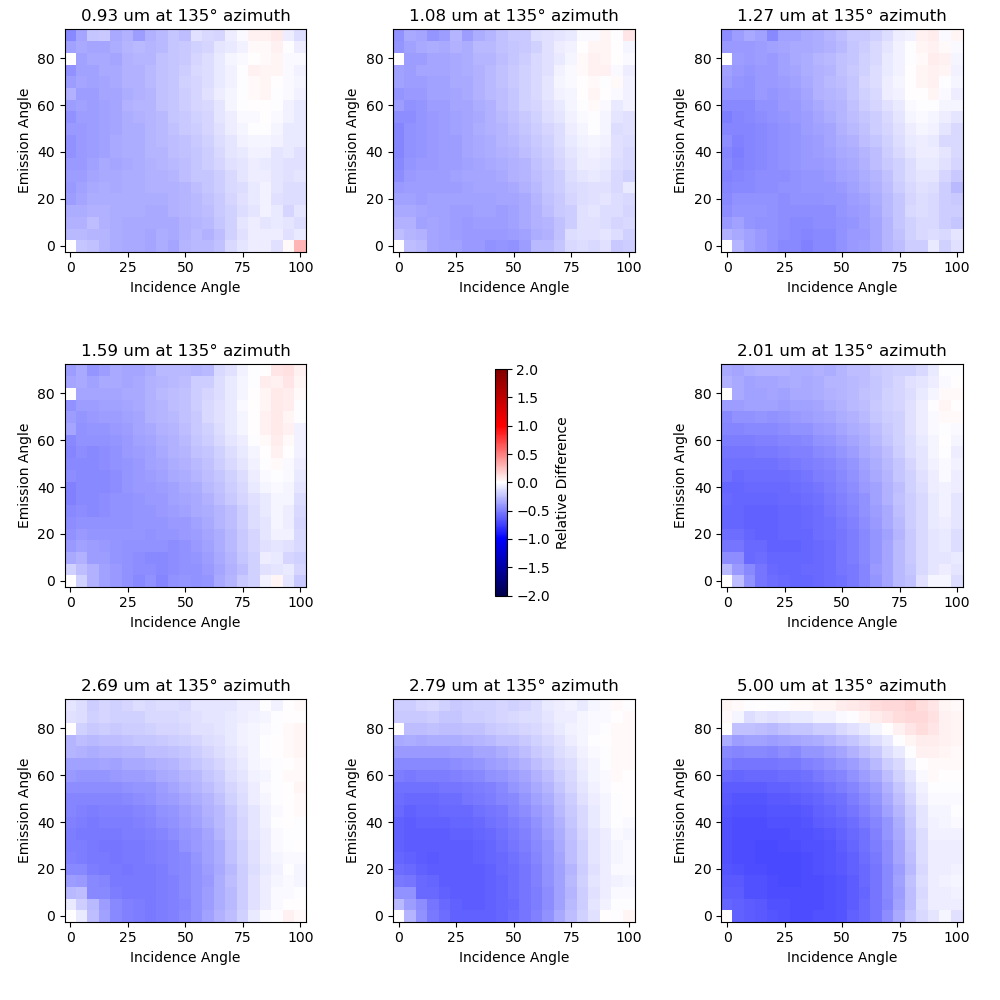

C:\Users\deran\AppData\Local\Temp\ipykernel_17316\3569896900.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.0)


In [9]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_NormDiff_0.93w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.08w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.27w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.59w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.01w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.69w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.79w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_5.00w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 2
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
fig.colorbar(c4, ax=cax, label='Relative Difference') 
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
axs[1,1].axis('off')
cax.axis('off')
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ '° azimuth')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ '° azimuth')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ '° azimuth')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ '° azimuth')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ '° azimuth')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ '° azimuth')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ '° azimuth')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ '° azimuth')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation as an mp4
writer = animation.FFMpegFileWriter(fps = 2)
ani.save('ObservationGeometriesRelativeDifference.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


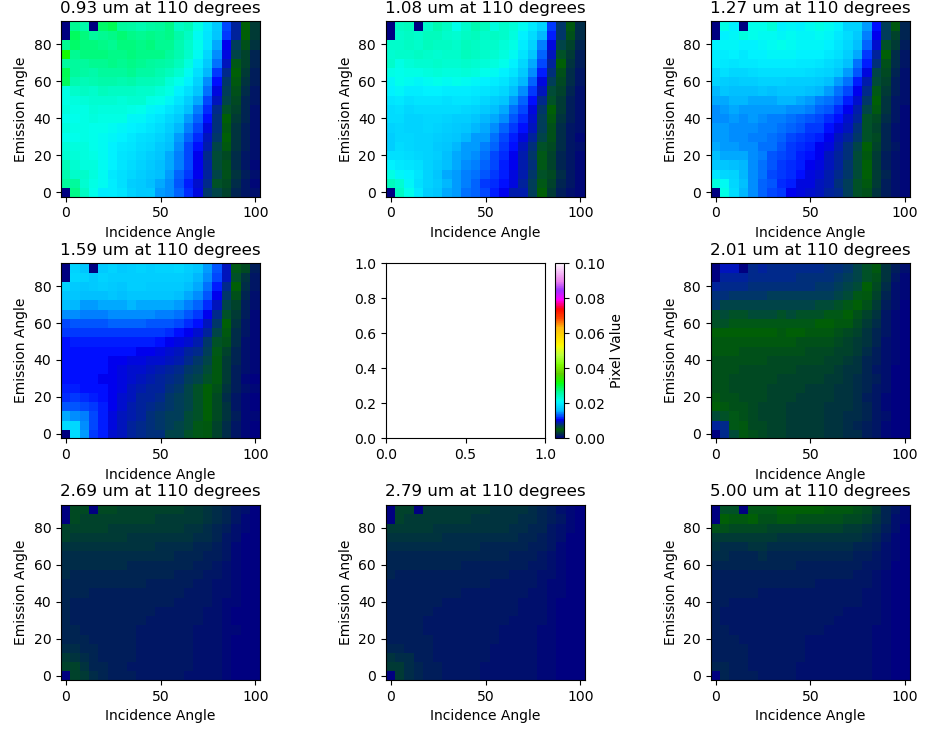

In [4]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.08w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.27w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.59w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.01w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.69w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.79w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_5.00w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.1
cmap = 'gist_ncar'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
fig.colorbar(c4, ax=axs[1,1], label='Pixel Value') 
fig.tight_layout(pad=1.0)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=0, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=0, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=0, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=0, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=0, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=0, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=0, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=0, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ ' degrees')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ ' degrees')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ ' degrees')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ ' degrees')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ ' degrees')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ ' degrees')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ ' degrees')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ ' degrees')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation using Pillow as a gif
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


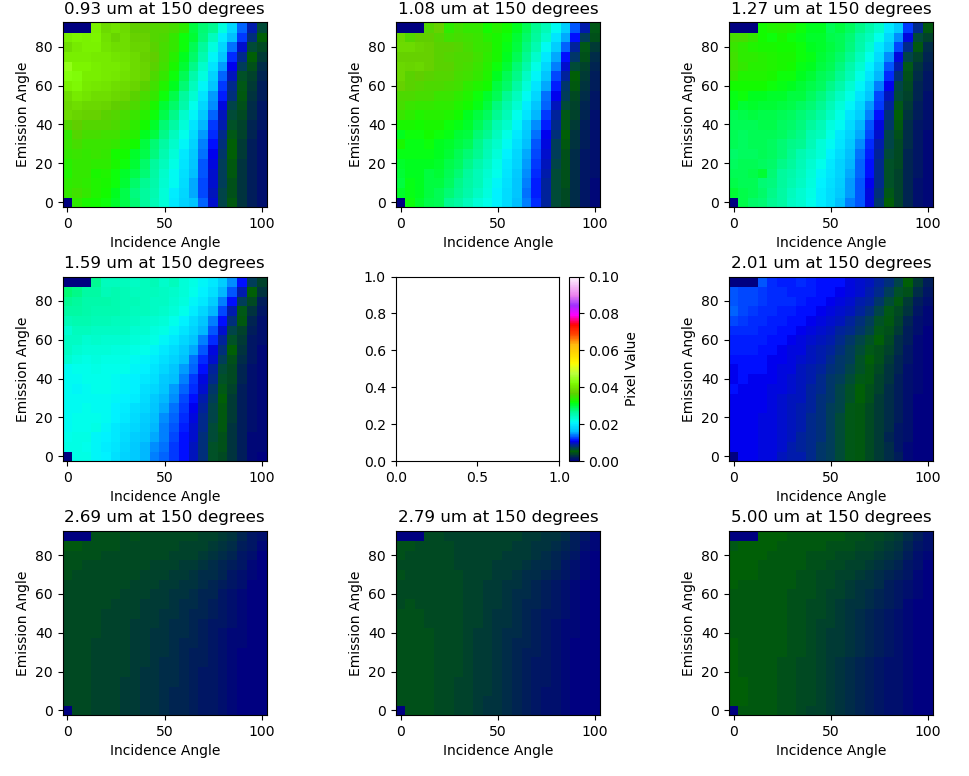

In [5]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_0.93wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.08wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.27wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_1.59wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.01wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.69wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_2.79wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_5.00wL.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.1
cmap = 'gist_ncar'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=0, vmax=scale)
fig.colorbar(c4, ax=axs[1,1], label='Pixel Value') 
fig.tight_layout(pad=1.0)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=0, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=0, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=0, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=0, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=0, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=0, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=0, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=0, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ ' degrees')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ ' degrees')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ ' degrees')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ ' degrees')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ ' degrees')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ ' degrees')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ ' degrees')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ ' degrees')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation using Pillow as a gif
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


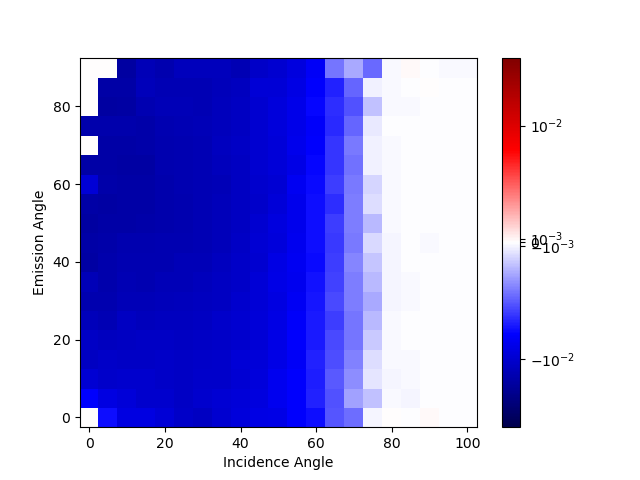

In [6]:
%matplotlib notebook
# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 

with open('iephi_consolidate_DIFF_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage[i][j][k] = float(row[i])
            if (math.isnan(dataStorage[i][j][k])):
                dataStorage[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
        
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

#The scale value for how much color detail we want:
scale = 0.04
cmap = 'seismic'

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

c = ax.pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, norm=colors.SymLogNorm(linthresh=0.001, linscale=0.03,
                                              vmin=-scale, vmax=scale, base=10))
fig.colorbar(c, ax=ax)
# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating.

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

def update(frame):
    ax.clear()
    zz = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz[y][x] = dataStorage[x][y][frame]
    ax.pcolor(xx, yy, zz, cmap=cmap, norm=colors.SymLogNorm(linthresh=0.001, linscale=0.03,
                                              vmin=-scale, vmax=scale, base=10))
    ax.set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle')

ani = animation.FuncAnimation(fig, update, frames=Z, interval=200)
plt.show()



